In [4]:
import jhu
import pandas as pd

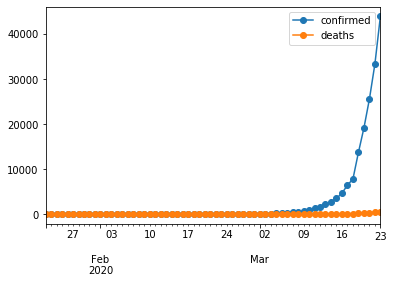

In [21]:
world = jhu.load_world()
world.US.tot.plot(style='-o')
plt.show()

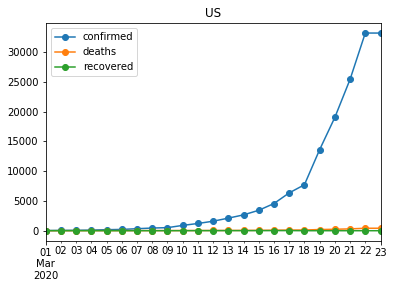

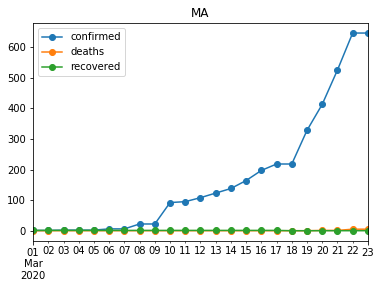

In [22]:
US = jhu.load_us()
start = pd.Timestamp('2020-03-01')

US['tot'][start:].plot(style='o-')
plt.title('US')
plt.show()

US['MA'][start:].plot(style='o-')
plt.title('MA')
plt.show()
